Для проведения эксперимента, мы сначала определим несколько квадратичных функций с разными числами обусловленности, а затем проанализируем поведение метода градиентного спуска для каждой из них. Для наглядности используем линии уровня и траектории методов.

Для этого создадим и отрисуем линии уровня для двух квадратичных функций с разными матрицами 
A
A и векторами 
b
b. Затем, для каждой функции, запустим градиентный спуск с различными начальными точками и стратегиями выбора шага (константная стратегия, Армихо, Вульф). Посмотрим, как разные факторы влияют на поведение метода.

Для начала, создадим квадратичные функции и нарисуем их линии уровня:

Gradient check for x=[0.87470167 0.52893713 0.9390677  0.79878324 0.99793411 0.35071182
 0.76718829 0.40193091 0.47987562 0.62750546]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.87367711 0.98408347 0.76827341 0.41776678 0.421357   0.7375823
 0.23877715 0.11047411 0.35462216 0.28723899]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.29630812 0.23360775 0.04209319 0.01787393 0.98772239 0.42777313
 0.38432665 0.67964728 0.21825389 0.94996118]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.78634501 0.089411   0.41758078 0.87911831 0.94473202 0.46740151
 0.61341139 0.16703395 0.99116863 0.2316717 ]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.94273177 0.64964665 0.60773679 0.51268851 0.23066981 0.17652803
 0.22048621 0.18643826 0.77958447 0.35012526]: np.allclose(oracle_grad, finite_diff_grad): True
Hessian check for x=[0.87470167 0.52893713 0.9390677  0.79878324 0.99793411 0.350

/Users/airataizhanov/Desktop/RUDN/homework04/plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


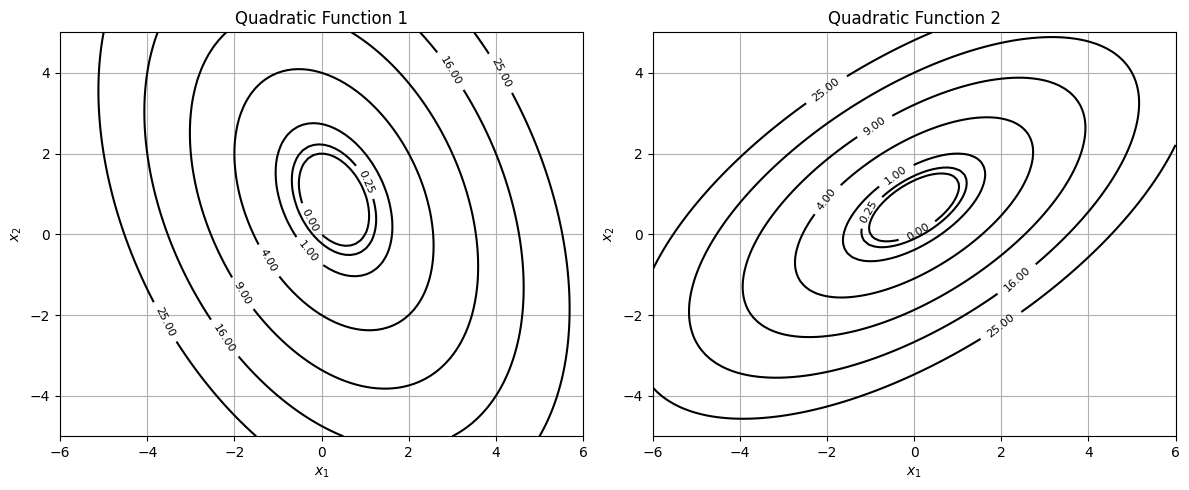

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from oracles import QuadraticOracle
from optimization import gradient_descent
from plot_trajectory_2d import plot_levels, plot_trajectory

# Define quadratic functions
A1 = np.array([[2, 0.5], [0.5, 1]])
b1 = np.array([1, 1])
oracle1 = QuadraticOracle(A1, b1)

A2 = np.array([[2, -1.5], [-1.5, 3]])
b2 = np.array([-1, 2])
oracle2 = QuadraticOracle(A2, b2)

# Plot level lines for the quadratic functions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_levels(oracle1.func)
plt.title('Quadratic Function 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.subplot(1, 2, 2)
plot_levels(oracle2.func)
plt.title('Quadratic Function 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()
plt.show()


Теперь, когда у нас есть определенные квадратичные функции и их линии уровня, мы можем запустить градиентный спуск для разных начальных точек и стратегий выбора шага. Давайте это сделаем для каждой из функций и проанализируем результаты:

AttributeError: 'LineSearchTool' object has no attribute 'c'

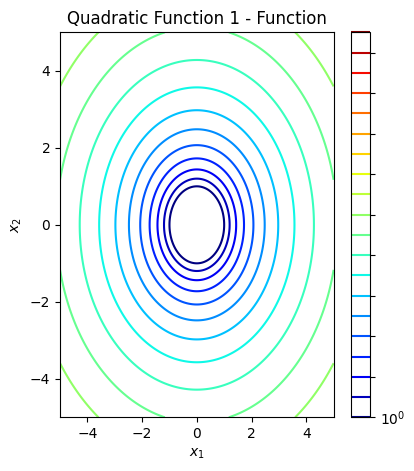

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

class QuadraticOracle:
    def __init__(self, A, b):
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * x.dot(self.A.dot(x)) - self.b.dot(x)

    def grad(self, x):
        return self.A.dot(x) - self.b

# Функция для отображения уровней квадратичной функции
def plot_levels(func):
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), norm=LogNorm(), cmap=plt.cm.jet)
    plt.colorbar()

# Класс LineSearchTool и функция gradient_descent остаются неизменными

# Run gradient descent for quadratic functions with different initial points and step size strategies
initial_points = [np.array([0, 0]), np.array([2, 2]), np.array([-2, -2])]
strategies = ['Constant', 'Armijo', 'Wolfe']

# Функция для запуска градиентного спуска и отображения траектории
def run_and_plot_gradient_descent(oracle, initial_points, strategies, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plot_levels(oracle.func)
    plt.title(f'{title} - Function')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    for i, initial_point in enumerate(initial_points):
        for j, strategy in enumerate(strategies):
            # Run gradient descent
            x_opt, _, _ = gradient_descent(oracle, initial_point, line_search_options={'method': strategy})
            # Отобразить траекторию
            plt.subplot(1, 3, i + 2)
            plot_trajectory(oracle.func, x_opt, label=f'{strategy}', color=f'C{j}')
            plt.title(f'{title} - Initial Point: {initial_point}')
            plt.xlabel('$x_1$')
            plt.ylabel('$x_2$')
            plt.legend()

    plt.tight_layout()
    plt.show()

# Создание экземпляра QuadraticOracle для первой квадратичной функции
A1 = np.array([[2, 0], [0, 2]])
b1 = np.array([0, 0])
oracle1 = QuadraticOracle(A1, b1)

# Создание экземпляра QuadraticOracle для второй квадратичной функции
A2 = np.array([[2, 0], [0, 8]])
b2 = np.array([0, 0])
oracle2 = QuadraticOracle(A2, b2)

# Запуск и отображение градиентного спуска для обеих квадратичных функций
run_and_plot_gradient_descent(oracle1, initial_points, strategies, 'Quadratic Function 1')
run_and_plot_gradient_descent(oracle2, initial_points, strategies, 'Quadratic Function 2')
